## Task 1

##### This jupyter notebook explains how I did web scraping, analyze data and visualize the results of the analysis.

#### Web Scraping Data
Web scraping is a crucial aspect of the data collection phase in this project. I used a package called BeautifulSoup to collect the data from the web. The data used is from the Skytrax website, if you visit the web [https://www.airlinequality.com] you will see a lot of data. In this task I will only take data that matches the task, namely British Airways and the Airline.

To access the relevant data, you can visit the following link: [https://www.airlinequality.com/airline-reviews/british-airways]. My objective is to scrape the review data using Python and BeautifulSoup, and then save it into a .csv file.

#### Data Cleaning
Once the data is stored in .csv format and converted into a dataframe, the next step is cleaning. Since I have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

#### Exploratory Data Analysis
I used a Lexicon-based analysis approach using the NLTK package to obtain sentiment analysis results categorized into positive, negative, and neutral sentiments.

#### Visualize the Results
The final stage involves visualizing the results of the data analysis. I used matplotlib to create pie charts representing sentiment distribution and display the most frequent words in the reviews using a word cloud.

### 1. Web Scraping Data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [3]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")  # Change parser to "html.parser"
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    # Date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    # Country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 33
Error on page 34
Error on page 34


In [4]:
#check the length of total reviews extracted
len(reviews)

3500

In [5]:
len(country)

3500

In [6]:
#check the length 
stars = stars[:3500]

In [7]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [8]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | We booked premium economy r...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,20th April 2024,United States
1,✅ Trip Verified | We chose Rotterdam and Lond...,1,12th April 2024,Netherlands
2,✅ Trip Verified | The entire booking and ticke...,6,10th April 2024,United States
3,Not Verified | British Airways cancelled my ...,1,10th April 2024,United States
4,Not Verified | I wanted to write this review s...,1,7th April 2024,United States


In [9]:
df.shape

(3500, 4)

In [10]:
df.to_csv("dataset_BA_reviews.csv")

### 2. Cleaning Data

In [11]:
df = pd.read_csv('/Users/irasafonik/dataset_BA_reviews.csv')
df.head()

,Unnamed: 0,reviews,stars,date,country
0,0,✅ Trip Verified | We booked premium economy r...,5.0,20th April 2024,United States
1,1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,12th April 2024,Netherlands
2,2,✅ Trip Verified | The entire booking and ticke...,6.0,10th April 2024,United States
3,3,Not Verified | British Airways cancelled my ...,1.0,10th April 2024,United States
4,4,Not Verified | I wanted to write this review s...,1.0,7th April 2024,United States


In [12]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [13]:
df['verified']

0        True
1        True
2        True
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

#### Cleaning Reviews
I will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [112]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irasafonik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/irasafonik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import re

In [16]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [17]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [18]:
df.head()

,Unnamed: 0,reviews,stars,date,country,verified,corpus
0,0,✅ Trip Verified | We booked premium economy r...,5.0,20th April 2024,United States,True,booked premium economy round trip phoenix zuri...
1,1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,12th April 2024,Netherlands,True,chose rotterdam london city airport convenienc...
2,2,✅ Trip Verified | The entire booking and ticke...,6.0,10th April 2024,United States,True,entire booking ticketing experience stressful ...
3,3,Not Verified | British Airways cancelled my ...,1.0,10th April 2024,United States,False,verified british airway cancelled flight le ho...
4,4,Not Verified | I wanted to write this review s...,1.0,7th April 2024,United States,False,verified wanted write review could give huge t...


#### Cleaning/Format date

In [19]:
df.dtypes

Unnamed: 0      int64
reviews        object
stars         float64
date           object
country        object
verified         bool
corpus         object
dtype: object

In [20]:
# Function to extract the date in the format '%Y-%m-%d'
def extract_date(date_str):
    # Extract the first number (day) from the date string
    day = re.findall(r'\d+', date_str)[0]  
    # Convert the extracted day to '%Y-%m-%d' format
    return pd.to_datetime(day, format='%d').strftime('%Y-%m-%d')

# Apply the function to the 'date' column
df['date'] = df['date'].apply(extract_date)

In [21]:
df.date.head()

0    1900-01-20
1    1900-01-12
2    1900-01-10
3    1900-01-10
4    1900-01-07
Name: date, dtype: object

#### Cleaning ratings with stars

In [22]:
#check for unique values
df.stars.unique()

array([ 5.,  1.,  6., 10.,  7.,  3.,  4.,  8.,  9.,  2., nan])

In [23]:
df.stars.value_counts()

stars
1.0     850
2.0     403
3.0     400
8.0     342
10.0    287
9.0     278
7.0     275
5.0     247
4.0     241
6.0     174
Name: count, dtype: int64

In [24]:
# Counting the number of NaN values in the 'stars' column
stars_nan_count = df['stars'].isna().sum()
stars_nan_count

3

There are 3 rows having values "NaN" in the ratings.I will drop all these 3 rows.

In [25]:
# drop the rows where the value of ratings is None
df.dropna(subset=['stars'], inplace=True)

In [26]:
#check the unique values again
df.stars.unique()

array([ 5.,  1.,  6., 10.,  7.,  3.,  4.,  8.,  9.,  2.])

#### Check for null Values

In [27]:
df.isnull().value_counts()

Unnamed: 0  reviews  stars  date   country  verified  corpus
False       False    False  False  False    False     False     3495
                                   True     False     False        2
Name: count, dtype: int64

In [28]:
df.country.isnull().value_counts()

country
False    3495
True        2
Name: count, dtype: int64

We have two missing values for country. For this we can just remove those two reviews (rows) from the dataframe.

In [29]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [30]:
df.country.isnull().value_counts()

country
False    3495
Name: count, dtype: int64

In [31]:
df.shape

(3495, 7)

#### Delete the column 'Unnamed: 0'

In [32]:
# Delete the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...
...,...,...,...,...,...,...
3490,2 recent flights LHR to SFO (12 hrs) - 7th Sep...,1.0,1900-01-24,United Kingdom,False,recent flight lhr sfo hr th sept san diego lhr...
3491,BA1326 LHR-NCL 18/09/2014. As is the norm flig...,8.0,1900-01-24,United Kingdom,False,ba lhr ncl norm flight departed late cabin cre...
3492,We flew on the A380 from Heathrow to Jo'burg r...,2.0,1900-01-24,Canada,False,flew heathrow jo burg return economy class tho...
3493,Considering our outbound flight to Orlando was...,5.0,1900-01-22,United Kingdom,False,considering outbound flight orlando delayed go...


In [34]:
# export the cleaned data
df.to_csv("cleaned_data-BA-reviews.csv")

### 3. Exploratory Data Analysis

In [35]:
cd = pd.read_csv('/Users/irasafonik/cleaned_data-BA-reviews.csv')
cd.drop('Unnamed: 0', axis=1, inplace=True)
#let's also check the index are in order
cd = cd.reset_index(drop=True)
cd.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...


In [36]:
# we Removes all special characters and numericals leaving the alphabets
import re
# Define a function to clean the text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
cd['Cleaned Reviews'] = cd['reviews'].apply(clean)
cd.head()

,reviews,stars,date,country,verified,corpus,Cleaned Reviews
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...,Trip Verified We booked premium economy round...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...,Trip Verified We chose Rotterdam and London C...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...,Trip Verified The entire booking and ticketin...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...,Not Verified British Airways cancelled my flig...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...,Not Verified I wanted to write this review so ...


In [37]:
cd['Cleaned Reviews'] = cd['Cleaned Reviews'].str.strip()
cd['Cleaned Reviews'] = cd['Cleaned Reviews'].str.lower()
cd.head()

,reviews,stars,date,country,verified,corpus,Cleaned Reviews
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...,trip verified we booked premium economy round ...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...,trip verified we chose rotterdam and london ci...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...,trip verified the entire booking and ticketing...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...,not verified british airways cancelled my flig...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...,not verified i wanted to write this review so ...


In [38]:
# import libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [39]:
# Preprocess the text
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Apply the function df

cd['Cleaned Reviews'] = cd['Cleaned Reviews'].apply(preprocess_text)

# Print the dataframe
cd.head()

,reviews,stars,date,country,verified,corpus,Cleaned Reviews
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...,trip verified booked premium economy round tri...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...,trip verified chose rotterdam london city airp...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...,trip verified entire booking ticketing experie...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...,verified british airway cancelled flight le ho...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...,verified wanted write review could give huge t...


In [40]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

cd['Score'] = cd['Cleaned Reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [42]:
cd['Sentiment'] = cd['Score'].apply(vader_analysis)
cd.head()

,reviews,stars,date,country,verified,corpus,Cleaned Reviews,Score,Sentiment
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...,trip verified booked premium economy round tri...,0.9393,Positive
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...,trip verified chose rotterdam london city airp...,0.3818,Neutral
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...,trip verified entire booking ticketing experie...,-0.9474,Negative
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...,verified british airway cancelled flight le ho...,-0.7650,Negative
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...,verified wanted write review could give huge t...,0.9637,Positive


In [43]:
sentiment_count = cd['Sentiment'].value_counts()
sentiment_count

Sentiment
Positive    1956
Negative    1169
Neutral      370
Name: count, dtype: int64

#### Visualize Sentiment

In [44]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

([<matplotlib.patches.Wedge at 0x12f06c750>,
 [Text(-0.2049539112900257, 1.0807376620840603, 'Positive'),
  Text(-0.15912596430385584, -1.0884295693724826, 'Negative'),
  Text(1.276021514977353, -0.44075967750566847, 'Neutral')],
 [Text(-0.11179304252183218, 0.5894932702276692, '56.0%'),
  Text(-0.08679598052937591, -0.5936888560213541, '33.4%'),
  Text(0.8034209538746296, -0.277515352503569, '10.6%')])

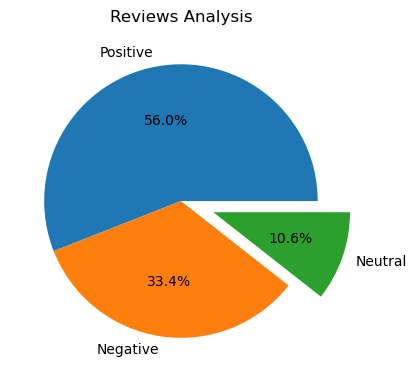

In [45]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(sentiment_count.values, labels = sentiment_count.index, 
        explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### 4. Visualize the Results

In [47]:
data = pd.read_csv('/Users/irasafonik/cleaned_data-BA-reviews.csv')
#let's also check the index are in order
data = df.reset_index(drop=True)
data.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We booked premium economy r...,5.0,1900-01-20,United States,True,booked premium economy round trip phoenix zuri...
1,✅ Trip Verified | We chose Rotterdam and Lond...,1.0,1900-01-12,Netherlands,True,chose rotterdam london city airport convenienc...
2,✅ Trip Verified | The entire booking and ticke...,6.0,1900-01-10,United States,True,entire booking ticketing experience stressful ...
3,Not Verified | British Airways cancelled my ...,1.0,1900-01-10,United States,False,verified british airway cancelled flight le ho...
4,Not Verified | I wanted to write this review s...,1.0,1900-01-07,United States,False,verified wanted write review could give huge t...


#### Average overall rating given for British Airways

In [48]:
data.stars.mean().round(1)

4.6

#### Total counts for each ratings

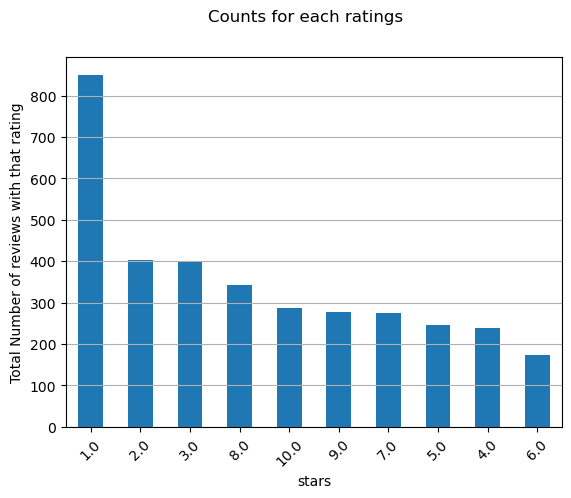

In [49]:
data.stars.value_counts().plot(kind="bar")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")
plt.gca().set_xticklabels(data.stars.value_counts().index, rotation=45)
plt.grid(axis='y')  
plt.show()

In [50]:
data_ratings = pd.DataFrame(data.stars.value_counts())
data_ratings

,count
stars,
1.0,850
2.0,403
3.0,400
8.0,342
10.0,287
9.0,278
7.0,274
5.0,247
4.0,240


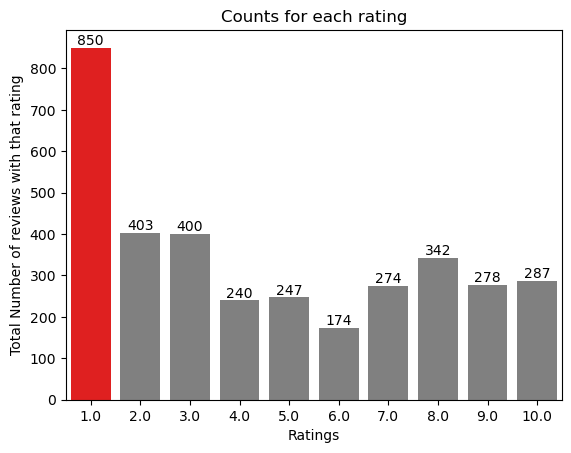

In [51]:
clrs = ['red' if (x == max(data_ratings['count'])) else 'grey' for x in data_ratings['count']]
ax = sns.barplot(x=data_ratings.index, y=data_ratings['count'], data=data_ratings, errwidth=0, palette=clrs)
ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")
plt.show()

In [52]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


#### Сountry with the most reviews

In [53]:
data_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()
data_country_review

,country,count
0,United Kingdom,2172
1,United States,404
2,Australia,144
3,Canada,109
4,Germany,64


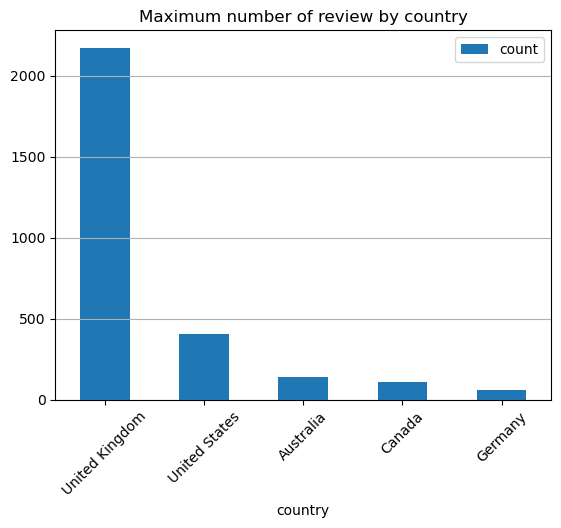

In [54]:
data_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Country that provided on average highest ratings

In [58]:
# Filter the data for numeric values of ratings
numeric_data = data[data['stars'].apply(lambda x: isinstance(x, (int, float)))]

# Group the data by country and compute the average rating
data_country_rating = pd.DataFrame(numeric_data.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

# Round the average rating to one decimal place
data_country_rating['avg_rating'] = data_country_rating['stars'].round(1)

# Drop the original 'stars' column
data_country_rating.drop(columns=['stars'], inplace=True)

data_country_rating

,country,avg_rating
0,Ecuador,10.0
1,Botswana,7.5
2,Turkey,7.3
3,Egypt,7.0
4,Ukraine,6.0
...,...,...
65,Hungary,1.5
66,Saint Kitts and Nevis,1.0
67,Jordan,1.0
68,Bahrain,1.0


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

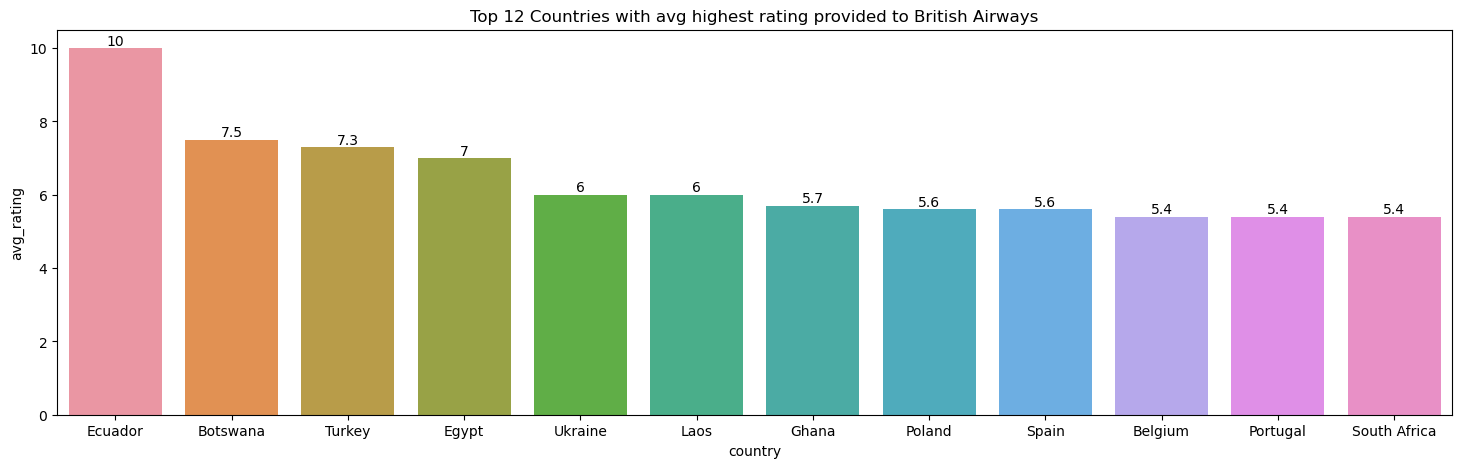

In [59]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=data_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

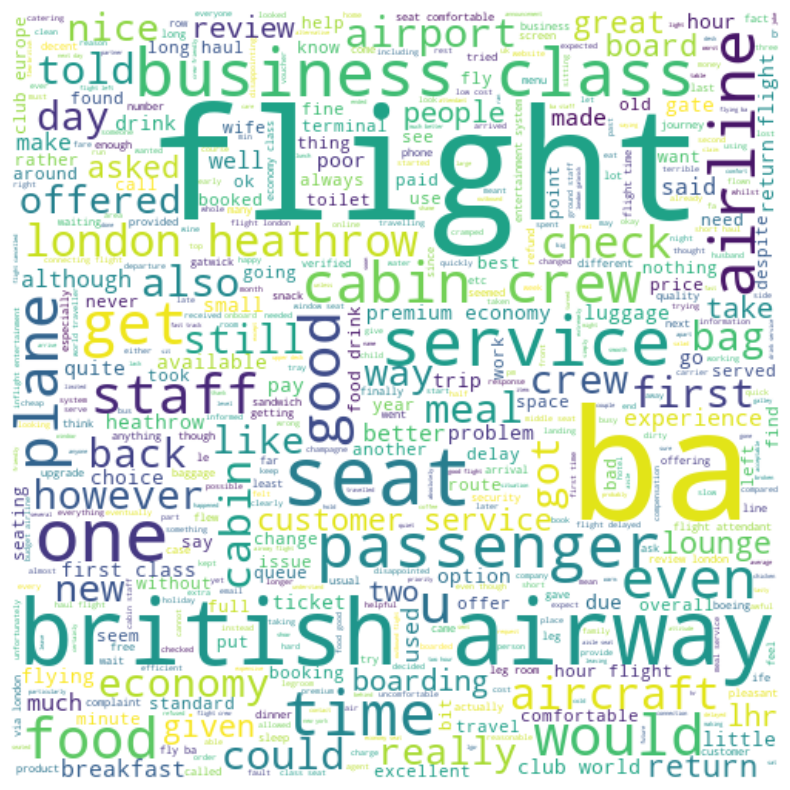

In [60]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Start with one review:
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=500, stopwords=stopwords, background_color='white').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

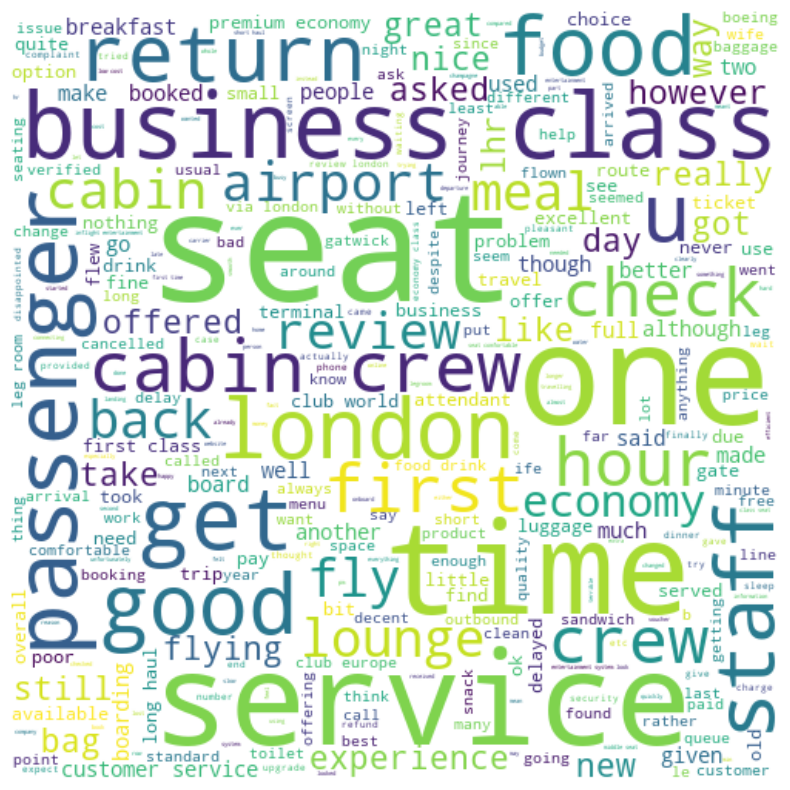

In [61]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords, background_color='white').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Frequency

In [62]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

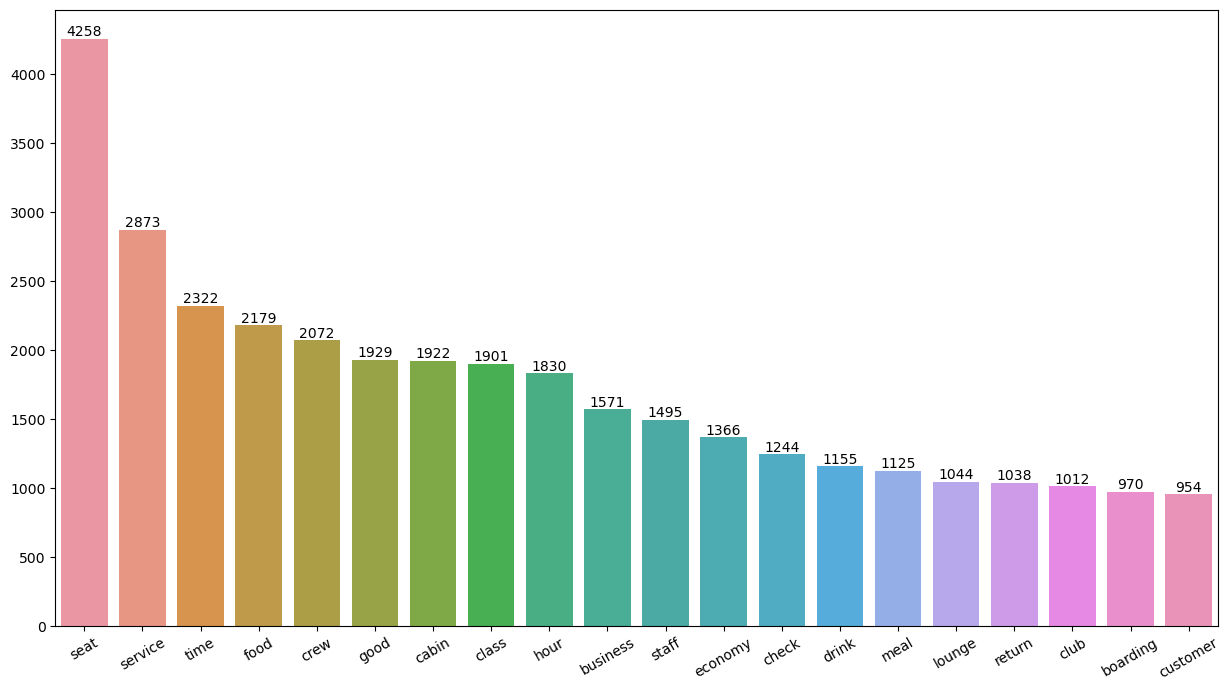

In [63]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This provides insight into the key topics customers are discussing, with "Seat" being the most prominent, followed by "Service" and "Time," all of which are crucial aspects of the customer experience. However, it's still unclear how customers feel about each of these aspects. To gain a deeper understanding, we'll utilize ngram plots to assess whether these experiences are positive or negative.

#### Word Frequency with N-gram

<Axes: >

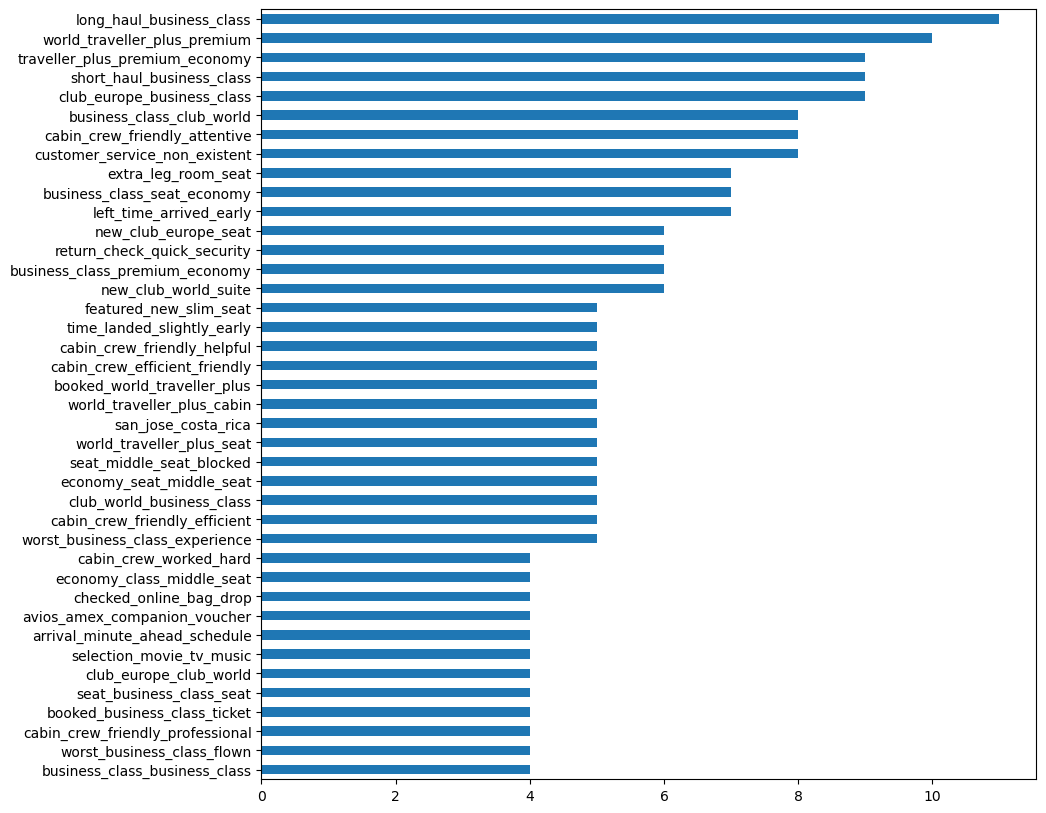

In [64]:
# Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(data.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_worked_hard, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [65]:
ratings_1_3 = data[data.stars.isin([1,2,3])]
ratings_4_6 = data[data.stars.isin([4,5,6])]
ratings_7_10 = data[data.stars.isin([7,8,9,10])]

<Axes: >

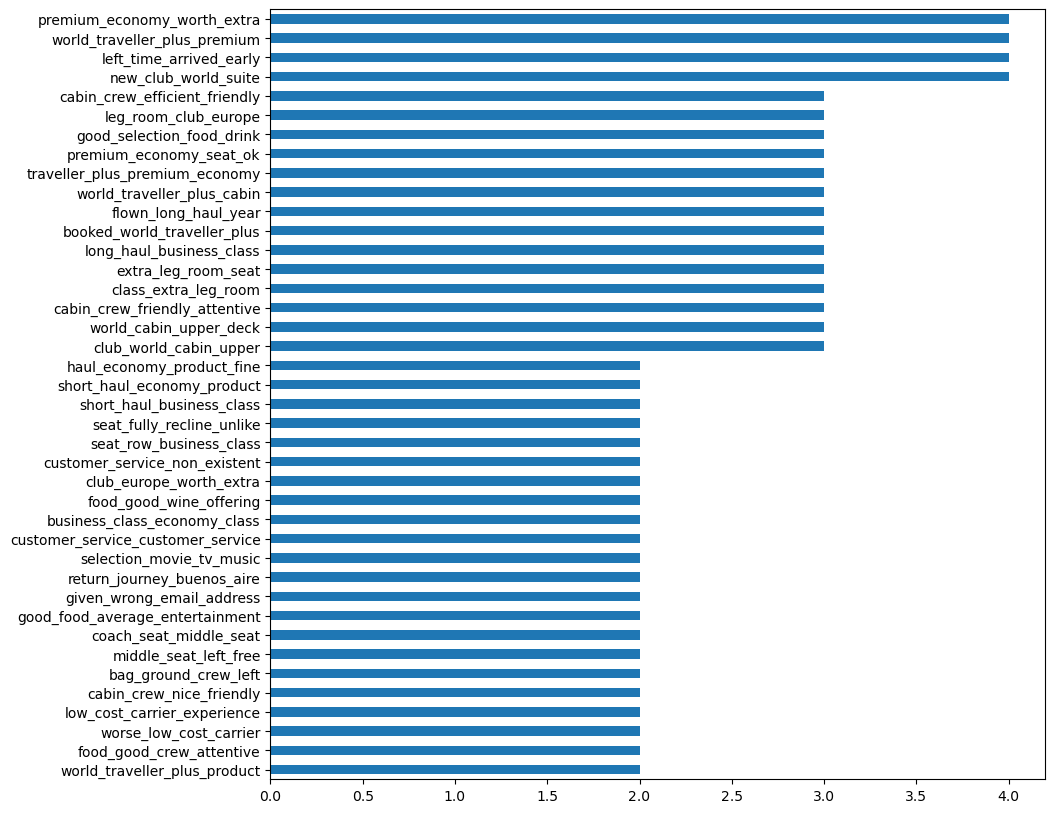

In [66]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

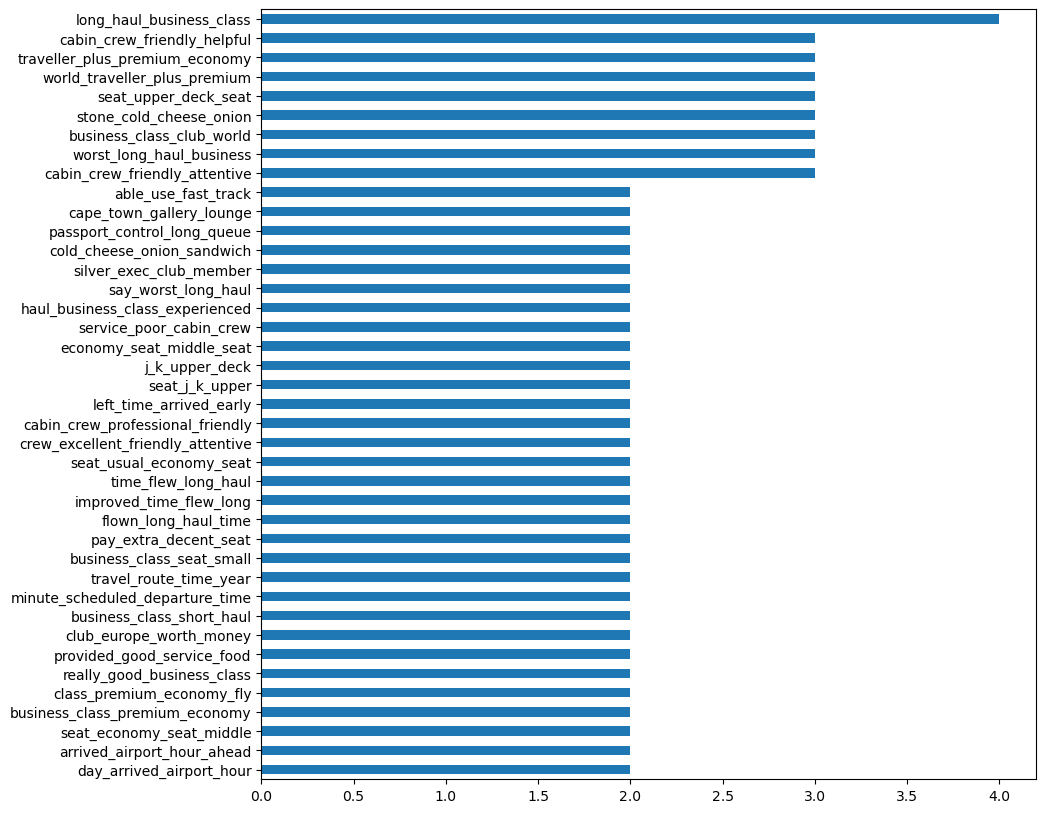

In [67]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

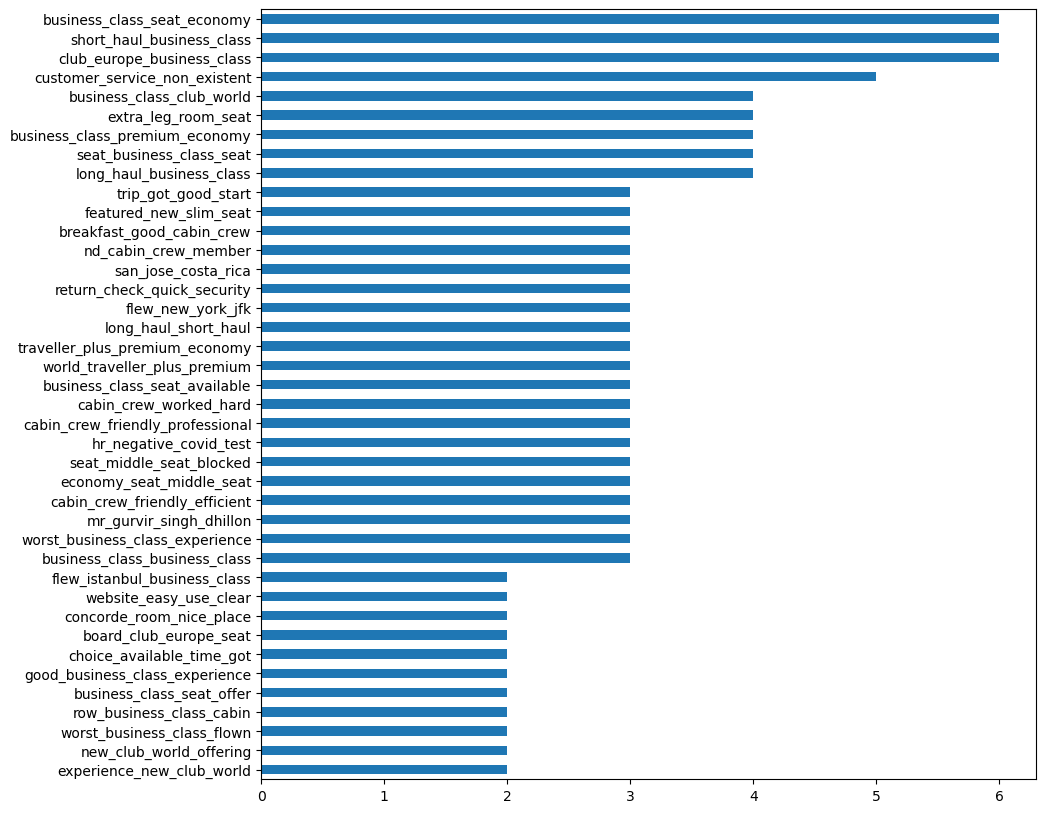

In [68]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [74]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
data['polarity'] = 0

for i in range(len(data.corpus)):
    sent= TextBlob(data.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    data['polarity'][i] = polarity

In [75]:
# let's see how many texts are with positive comments

print(f"{data[(data['polarity'] >-0.2) & (data['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{data[(data['polarity'] >-0.1) & (data['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2389 number of reviews between -0.2 and 0.2 polarity score
1388 number of reviews between -0.1 and 0.1 polarity score


Out of the total number of reviews analyzed, 2391 fall within the polarity range of -0.2 to 0.2, indicating a relatively neutral sentiment. When we narrow down the range to -0.1 to 0.1, we find that 1387 reviews remain in this neutral zone.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [76]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
data['label'] = 0
    
for i in range(len(data.corpus)):
    
    score = vds.polarity_scores(data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        data['label'][i] = 1
        #print("1st")
    elif score < 0:
        data['label'][i] = -1
        #print("2nd")
    else:
        data['label'][i] = 0

In [77]:
data.label.value_counts()

label
 1    2203
-1    1172
 0     120
Name: count, dtype: int64

Data indicates that most reviews are positively labeled (2203), suggesting a positive sentiment. However, there's a significant number of negatively labeled reviews (1172). Additionally, there are a few reviews (120) that fall into the neutral category.